In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/My Drive/EVA5/Week7New/")

In [ ]:
import time
import torch
!pip install torchsummary
from data.data_loaders.base_data_loader import BaseDataLoader
from data.base_data_utils import get_data_loaders
from utils.misc_utils import get_device_type
from models.networks.cifar10_dialation_dsc import Cifar10Net
from configs import basic_config
from utils.visualization_utils import plot_multigraph, plot_misclassified_images
from models.model_builder import build_model
from utils import logger_utils
from orchestrators.base_orchestrator import start_training
from torchsummary import summary

In [ ]:
logger = logger_utils.get_logger(__name__)

In [ ]:
train_loader, test_loader = get_data_loaders(dataset_name='cifar10')


**** Started Loading data ****

Files already downloaded and verified
CUDA Available? True
Files already downloaded and verified
CUDA Available? True
CUDA Available? True

**** Ended Loading data ****



In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  cat   cat  deer  deer


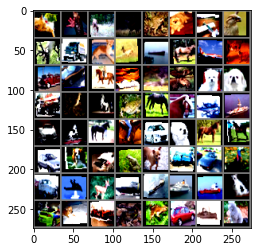

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
def print_summary(network,title):
  print(title)
  summary(network,input_size=(3,32,32))

In [ ]:
device = get_device_type()
model = Cifar10Net().to(device)
print_summary(model,'Network summary')

Network summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
 Conv2d_BasicBlock-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
 Conv2d_BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9          [-1, 128, 32, 32]          73,728
      BatchNorm2d-10          [-1, 128, 32, 32]             256
             ReLU-11          [-1, 128, 32, 32]               0
Conv2d_BasicBlock-12          [-1, 128, 32, 32]               0
        MaxPool2d-13          [-1, 128, 16, 16]               0
           Conv2d-14   

/content/drive/My Drive/EVA5/Week7New/models/networks/cifar10_dialation_dsc.py:69: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [ ]:
EPOCHS = basic_config.EPOCHS
device = get_device_type()
results = {}

# models_dict = {'l1_BN': {'model': get_base_model(), 'l1_lambda':3.994568295536243e-05},
#           'l2_BN': {'model': get_base_model(), 'l2_lambda':0.0002871},
#           'l1_l2_BN': {'model': get_base_model(), 'l1_lambda':1.4700778484806588e-05, 'l2_lambda':1.4212922008994122e-05},
#           'GBN': {'model': get_base_model(is_gbn = True), 'l1_lambda':0, 'l2_lambda':0},
#           'l1_l2_GBN': {'model': get_base_model(is_gbn = True), 'l1_lambda':8.283167683030542e-05, 'l2_lambda':9.098971072011508e-05},
#           }
models_dict = {'cifar10': {'model': model}
          }

lst_plottingJobs_val_acc = []
lst_plottingLegends_val_acc = []
lst_plottingJobs_loss = []
lst_plottingLegends_loss = []

## Training

train_loader, test_loader = get_data_loaders()
results = start_training(EPOCHS, device, train_loader, test_loader, **models_dict)


**** Started Loading data ****

Files already downloaded and verified
CUDA Available? True
CUDA Available? True
CUDA Available? True
Files already downloaded and verified


  0%|          | 0/782 [00:00<?, ?it/s]

CUDA Available? True
CUDA Available? True
CUDA Available? True
CUDA Available? True

**** Ended Loading data ****


**** Started training ****


Model: cifar10

0 0
[EPOCH:0]


/content/drive/My Drive/EVA5/Week7New/models/networks/cifar10_dialation_dsc.py:69: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Loss=1.387333869934082 Batch_id=781 Current_train_batch_accuracy=40.06: 100%|██████████| 782/782 [01:09<00:00, 11.23it/s]



Train set: Average loss: 1.3843, Accuracy: 24529/50000 (49.06%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.3935, Accuracy: 4844/10000 (48.44%)

best_test_accuracy 48.44
[EPOCH:1]


Loss=1.2950211763381958 Batch_id=781 Current_train_batch_accuracy=56.97: 100%|██████████| 782/782 [01:08<00:00, 11.46it/s]



Train set: Average loss: 1.0934, Accuracy: 30449/50000 (60.90%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0610, Accuracy: 6229/10000 (62.29%)

best_test_accuracy 62.29
[EPOCH:2]


Loss=0.8550058007240295 Batch_id=781 Current_train_batch_accuracy=64.16: 100%|██████████| 782/782 [01:09<00:00, 11.30it/s]



Train set: Average loss: 1.0489, Accuracy: 31487/50000 (62.97%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0239, Accuracy: 6472/10000 (64.72%)

best_test_accuracy 64.72
[EPOCH:3]


Loss=1.223862648010254 Batch_id=781 Current_train_batch_accuracy=68.89: 100%|██████████| 782/782 [01:08<00:00, 11.47it/s]



Train set: Average loss: 1.0708, Accuracy: 32279/50000 (64.56%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0534, Accuracy: 6571/10000 (65.71%)

best_test_accuracy 65.71
[EPOCH:4]


Loss=0.8311768770217896 Batch_id=781 Current_train_batch_accuracy=71.91: 100%|██████████| 782/782 [01:09<00:00, 11.27it/s]



Train set: Average loss: 0.8936, Accuracy: 34872/50000 (69.74%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8727, Accuracy: 7099/10000 (70.99%)

best_test_accuracy 70.99
[EPOCH:5]


Loss=0.8294066786766052 Batch_id=781 Current_train_batch_accuracy=74.03: 100%|██████████| 782/782 [01:08<00:00, 11.47it/s]



Train set: Average loss: 0.7223, Accuracy: 37326/50000 (74.65%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7291, Accuracy: 7471/10000 (74.71%)

best_test_accuracy 74.71
[EPOCH:6]


Loss=1.2628726959228516 Batch_id=781 Current_train_batch_accuracy=75.74: 100%|██████████| 782/782 [01:09<00:00, 11.26it/s]



Train set: Average loss: 0.6740, Accuracy: 38345/50000 (76.69%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6597, Accuracy: 7738/10000 (77.38%)

best_test_accuracy 77.38
[EPOCH:7]


Loss=1.1038801670074463 Batch_id=781 Current_train_batch_accuracy=77.13: 100%|██████████| 782/782 [01:08<00:00, 11.50it/s]



Train set: Average loss: 0.7120, Accuracy: 37599/50000 (75.20%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7127, Accuracy: 7587/10000 (75.87%)

best_test_accuracy 77.38
[EPOCH:8]


Loss=0.6143091320991516 Batch_id=781 Current_train_batch_accuracy=78.11: 100%|██████████| 782/782 [01:09<00:00, 11.31it/s]



Train set: Average loss: 0.6867, Accuracy: 38256/50000 (76.51%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6772, Accuracy: 7697/10000 (76.97%)

best_test_accuracy 77.38
[EPOCH:9]


Loss=0.34924763441085815 Batch_id=781 Current_train_batch_accuracy=78.84: 100%|██████████| 782/782 [01:07<00:00, 11.57it/s]



Train set: Average loss: 0.6153, Accuracy: 39133/50000 (78.27%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6523, Accuracy: 7783/10000 (77.83%)

best_test_accuracy 77.83
[EPOCH:10]


Loss=0.7453637719154358 Batch_id=781 Current_train_batch_accuracy=79.61: 100%|██████████| 782/782 [01:08<00:00, 11.41it/s]



Train set: Average loss: 0.5828, Accuracy: 39884/50000 (79.77%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6151, Accuracy: 7984/10000 (79.84%)

best_test_accuracy 79.84
[EPOCH:11]


Loss=0.8127294778823853 Batch_id=781 Current_train_batch_accuracy=80.75: 100%|██████████| 782/782 [01:07<00:00, 11.59it/s]



Train set: Average loss: 0.6062, Accuracy: 39529/50000 (79.06%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6397, Accuracy: 7889/10000 (78.89%)

best_test_accuracy 79.84
[EPOCH:12]


Loss=0.5315130352973938 Batch_id=781 Current_train_batch_accuracy=83.91: 100%|██████████| 782/782 [01:08<00:00, 11.40it/s]



Train set: Average loss: 0.4106, Accuracy: 42890/50000 (85.78%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4513, Accuracy: 8446/10000 (84.46%)

best_test_accuracy 84.46
[EPOCH:13]


Loss=0.9406939148902893 Batch_id=781 Current_train_batch_accuracy=84.68: 100%|██████████| 782/782 [01:07<00:00, 11.51it/s]



Train set: Average loss: 0.3969, Accuracy: 43100/50000 (86.20%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4460, Accuracy: 8484/10000 (84.84%)

best_test_accuracy 84.84
[EPOCH:14]


Loss=0.6206895709037781 Batch_id=781 Current_train_batch_accuracy=85.01: 100%|██████████| 782/782 [01:08<00:00, 11.37it/s]



Train set: Average loss: 0.3925, Accuracy: 43112/50000 (86.22%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4453, Accuracy: 8506/10000 (85.06%)

best_test_accuracy 85.06
[EPOCH:15]


Loss=0.5742627382278442 Batch_id=781 Current_train_batch_accuracy=85.37: 100%|██████████| 782/782 [01:07<00:00, 11.58it/s]



Train set: Average loss: 0.3885, Accuracy: 43269/50000 (86.54%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4414, Accuracy: 8485/10000 (84.85%)

best_test_accuracy 85.06
[EPOCH:16]


Loss=0.5709244012832642 Batch_id=781 Current_train_batch_accuracy=85.48: 100%|██████████| 782/782 [01:08<00:00, 11.41it/s]



Train set: Average loss: 0.3785, Accuracy: 43454/50000 (86.91%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4386, Accuracy: 8506/10000 (85.06%)

best_test_accuracy 85.06
[EPOCH:17]


Loss=0.276603639125824 Batch_id=781 Current_train_batch_accuracy=85.82: 100%|██████████| 782/782 [01:07<00:00, 11.58it/s]



Train set: Average loss: 0.3682, Accuracy: 43592/50000 (87.18%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4266, Accuracy: 8550/10000 (85.50%)

best_test_accuracy 85.5
[EPOCH:18]


Loss=0.44374731183052063 Batch_id=781 Current_train_batch_accuracy=86.10: 100%|██████████| 782/782 [01:08<00:00, 11.42it/s]



Train set: Average loss: 0.3892, Accuracy: 43229/50000 (86.46%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4556, Accuracy: 8485/10000 (84.85%)

best_test_accuracy 85.5
[EPOCH:19]


Loss=0.4476878046989441 Batch_id=781 Current_train_batch_accuracy=86.30: 100%|██████████| 782/782 [01:07<00:00, 11.59it/s]



Train set: Average loss: 0.3528, Accuracy: 43805/50000 (87.61%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4273, Accuracy: 8576/10000 (85.76%)

best_test_accuracy 85.76
[EPOCH:20]


Loss=1.1397982835769653 Batch_id=781 Current_train_batch_accuracy=86.36: 100%|██████████| 782/782 [01:08<00:00, 11.43it/s]



Train set: Average loss: 0.3488, Accuracy: 43930/50000 (87.86%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4247, Accuracy: 8550/10000 (85.50%)

best_test_accuracy 85.76
[EPOCH:21]


Loss=0.4654422104358673 Batch_id=781 Current_train_batch_accuracy=86.59: 100%|██████████| 782/782 [01:07<00:00, 11.56it/s]



Train set: Average loss: 0.3431, Accuracy: 44085/50000 (88.17%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4120, Accuracy: 8573/10000 (85.73%)

best_test_accuracy 85.76
[EPOCH:22]


Loss=0.6053648591041565 Batch_id=781 Current_train_batch_accuracy=86.78: 100%|██████████| 782/782 [01:08<00:00, 11.38it/s]



Train set: Average loss: 0.3518, Accuracy: 43779/50000 (87.56%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4291, Accuracy: 8553/10000 (85.53%)

best_test_accuracy 85.76
[EPOCH:23]


Loss=0.7709328532218933 Batch_id=781 Current_train_batch_accuracy=87.14: 100%|██████████| 782/782 [01:07<00:00, 11.54it/s]



Train set: Average loss: 0.3368, Accuracy: 44124/50000 (88.25%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4154, Accuracy: 8585/10000 (85.85%)

best_test_accuracy 85.85
[EPOCH:24]


Loss=0.9793034195899963 Batch_id=781 Current_train_batch_accuracy=88.01: 100%|██████████| 782/782 [01:09<00:00, 11.29it/s]



Train set: Average loss: 0.3125, Accuracy: 44529/50000 (89.06%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3991, Accuracy: 8659/10000 (86.59%)

best_test_accuracy 86.59
[EPOCH:25]


Loss=0.2339184582233429 Batch_id=781 Current_train_batch_accuracy=88.19: 100%|██████████| 782/782 [01:08<00:00, 11.45it/s]



Train set: Average loss: 0.3069, Accuracy: 44628/50000 (89.26%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3942, Accuracy: 8654/10000 (86.54%)

best_test_accuracy 86.59
[EPOCH:26]


Loss=0.7113807201385498 Batch_id=781 Current_train_batch_accuracy=88.19: 100%|██████████| 782/782 [01:09<00:00, 11.28it/s]



Train set: Average loss: 0.3040, Accuracy: 44718/50000 (89.44%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3972, Accuracy: 8638/10000 (86.38%)

best_test_accuracy 86.59
[EPOCH:27]


Loss=0.2624320387840271 Batch_id=781 Current_train_batch_accuracy=88.14: 100%|██████████| 782/782 [01:07<00:00, 11.55it/s]



Train set: Average loss: 0.3026, Accuracy: 44742/50000 (89.48%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3967, Accuracy: 8638/10000 (86.38%)

best_test_accuracy 86.59
[EPOCH:28]


Loss=0.5334255695343018 Batch_id=781 Current_train_batch_accuracy=88.46: 100%|██████████| 782/782 [01:08<00:00, 11.39it/s]



Train set: Average loss: 0.2990, Accuracy: 44723/50000 (89.45%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3940, Accuracy: 8667/10000 (86.67%)

best_test_accuracy 86.67
[EPOCH:29]


Loss=0.38480865955352783 Batch_id=781 Current_train_batch_accuracy=88.44: 100%|██████████| 782/782 [01:08<00:00, 11.48it/s]



Train set: Average loss: 0.2953, Accuracy: 44838/50000 (89.68%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3954, Accuracy: 8659/10000 (86.59%)

best_test_accuracy 86.67
[EPOCH:30]


Loss=0.9272677302360535 Batch_id=781 Current_train_batch_accuracy=88.58: 100%|██████████| 782/782 [01:09<00:00, 11.28it/s]



Train set: Average loss: 0.2976, Accuracy: 44809/50000 (89.62%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3962, Accuracy: 8650/10000 (86.50%)

best_test_accuracy 86.67
[EPOCH:31]


Loss=0.16039922833442688 Batch_id=781 Current_train_batch_accuracy=88.41: 100%|██████████| 782/782 [01:08<00:00, 11.47it/s]



Train set: Average loss: 0.2937, Accuracy: 44935/50000 (89.87%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3948, Accuracy: 8655/10000 (86.55%)

best_test_accuracy 86.67
[EPOCH:32]


Loss=0.4382978677749634 Batch_id=781 Current_train_batch_accuracy=88.74: 100%|██████████| 782/782 [01:09<00:00, 11.29it/s]



Train set: Average loss: 0.2963, Accuracy: 44785/50000 (89.57%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3977, Accuracy: 8638/10000 (86.38%)

best_test_accuracy 86.67
[EPOCH:33]


Loss=0.5231783390045166 Batch_id=781 Current_train_batch_accuracy=88.81: 100%|██████████| 782/782 [01:08<00:00, 11.47it/s]



Train set: Average loss: 0.2982, Accuracy: 44736/50000 (89.47%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3951, Accuracy: 8668/10000 (86.68%)

best_test_accuracy 86.68
[EPOCH:34]


Loss=0.21774785220623016 Batch_id=781 Current_train_batch_accuracy=88.94: 100%|██████████| 782/782 [01:09<00:00, 11.29it/s]



Train set: Average loss: 0.2917, Accuracy: 44885/50000 (89.77%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3966, Accuracy: 8661/10000 (86.61%)

best_test_accuracy 86.68
[EPOCH:35]


Loss=0.36312562227249146 Batch_id=781 Current_train_batch_accuracy=88.80: 100%|██████████| 782/782 [01:08<00:00, 11.49it/s]



Train set: Average loss: 0.2901, Accuracy: 44947/50000 (89.89%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3954, Accuracy: 8664/10000 (86.64%)

best_test_accuracy 86.68
[EPOCH:36]


Loss=0.0725928470492363 Batch_id=781 Current_train_batch_accuracy=88.58: 100%|██████████| 782/782 [01:09<00:00, 11.29it/s]



Train set: Average loss: 0.2923, Accuracy: 44964/50000 (89.93%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3924, Accuracy: 8675/10000 (86.75%)

best_test_accuracy 86.75
[EPOCH:37]


Loss=0.19280050694942474 Batch_id=781 Current_train_batch_accuracy=88.97: 100%|██████████| 782/782 [01:08<00:00, 11.49it/s]



Train set: Average loss: 0.2875, Accuracy: 44986/50000 (89.97%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3900, Accuracy: 8672/10000 (86.72%)

best_test_accuracy 86.75
[EPOCH:38]


Loss=0.7024121284484863 Batch_id=781 Current_train_batch_accuracy=89.25: 100%|██████████| 782/782 [01:09<00:00, 11.27it/s]



Train set: Average loss: 0.2868, Accuracy: 44971/50000 (89.94%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3909, Accuracy: 8685/10000 (86.85%)

best_test_accuracy 86.85
[EPOCH:39]


Loss=0.15950602293014526 Batch_id=781 Current_train_batch_accuracy=88.92: 100%|██████████| 782/782 [01:08<00:00, 11.46it/s]



Train set: Average loss: 0.2848, Accuracy: 45023/50000 (90.05%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3902, Accuracy: 8672/10000 (86.72%)

best_test_accuracy 86.85
[EPOCH:40]


Loss=0.15682056546211243 Batch_id=781 Current_train_batch_accuracy=89.02: 100%|██████████| 782/782 [01:09<00:00, 11.27it/s]



Train set: Average loss: 0.2844, Accuracy: 45061/50000 (90.12%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3896, Accuracy: 8668/10000 (86.68%)

best_test_accuracy 86.85
[EPOCH:41]


Loss=0.5306066870689392 Batch_id=781 Current_train_batch_accuracy=89.13: 100%|██████████| 782/782 [01:08<00:00, 11.47it/s]



Train set: Average loss: 0.2864, Accuracy: 44970/50000 (89.94%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3921, Accuracy: 8688/10000 (86.88%)

best_test_accuracy 86.88
[EPOCH:42]


Loss=0.392371267080307 Batch_id=781 Current_train_batch_accuracy=89.13: 100%|██████████| 782/782 [01:09<00:00, 11.27it/s]



Train set: Average loss: 0.2857, Accuracy: 45035/50000 (90.07%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3923, Accuracy: 8674/10000 (86.74%)

best_test_accuracy 86.88
[EPOCH:43]


Loss=0.5032942891120911 Batch_id=781 Current_train_batch_accuracy=89.04: 100%|██████████| 782/782 [01:07<00:00, 11.55it/s]



Train set: Average loss: 0.2860, Accuracy: 44965/50000 (89.93%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3933, Accuracy: 8681/10000 (86.81%)

best_test_accuracy 86.88
[EPOCH:44]


Loss=0.6978463530540466 Batch_id=781 Current_train_batch_accuracy=89.18: 100%|██████████| 782/782 [01:08<00:00, 11.36it/s]



Train set: Average loss: 0.2817, Accuracy: 45113/50000 (90.23%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3946, Accuracy: 8674/10000 (86.74%)

best_test_accuracy 86.88
[EPOCH:45]


Loss=0.20842652022838593 Batch_id=781 Current_train_batch_accuracy=89.14: 100%|██████████| 782/782 [01:07<00:00, 11.54it/s]



Train set: Average loss: 0.2821, Accuracy: 45094/50000 (90.19%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3935, Accuracy: 8668/10000 (86.68%)

best_test_accuracy 86.88
[EPOCH:46]


Loss=0.26390138268470764 Batch_id=781 Current_train_batch_accuracy=89.08: 100%|██████████| 782/782 [01:08<00:00, 11.37it/s]



Train set: Average loss: 0.2856, Accuracy: 45029/50000 (90.06%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3927, Accuracy: 8673/10000 (86.73%)

best_test_accuracy 86.88
[EPOCH:47]


Loss=0.39830923080444336 Batch_id=781 Current_train_batch_accuracy=89.12: 100%|██████████| 782/782 [01:07<00:00, 11.54it/s]



Train set: Average loss: 0.2807, Accuracy: 45073/50000 (90.15%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3922, Accuracy: 8678/10000 (86.78%)

best_test_accuracy 86.88
[EPOCH:48]


Loss=0.14643387496471405 Batch_id=781 Current_train_batch_accuracy=89.20: 100%|██████████| 782/782 [01:08<00:00, 11.39it/s]



Train set: Average loss: 0.2800, Accuracy: 45173/50000 (90.35%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3868, Accuracy: 8680/10000 (86.80%)

best_test_accuracy 86.88
[EPOCH:49]


Loss=0.8409401178359985 Batch_id=781 Current_train_batch_accuracy=89.23: 100%|██████████| 782/782 [01:07<00:00, 11.52it/s]



Train set: Average loss: 0.2874, Accuracy: 44983/50000 (89.97%)


Test set: Average loss: 0.3916, Accuracy: 8671/10000 (86.71%)

best_test_accuracy 86.88

results : {'cifar10': [[49.058, 60.898, 62.974, 64.558, 69.744, 74.652, 76.69, 75.198, 76.512, 78.266, 79.768, 79.058, 85.78, 86.2, 86.224, 86.538, 86.908, 87.184, 86.458, 87.61, 87.86, 88.17, 87.558, 88.248, 89.058, 89.256, 89.436, 89.484, 89.446, 89.676, 89.618, 89.87, 89.57, 89.472, 89.77, 89.894, 89.928, 89.972, 89.942, 90.046, 90.122, 89.94, 90.07, 89.93, 90.226, 90.188, 90.058, 90.146, 90.346, 89.966], [1.3842541051483155, 1.0934081965827942, 1.0489079948806763, 1.0707846775245666, 0.8936047265243531, 0.7222911628341675, 0.6740161677265167, 0.7120473413276672, 0.6867389180374146, 0.6152922101211548, 0.5827813020515442, 0.6062440336036682, 0.4105623631286621, 0.3969280643081665, 0.39248105676651, 0.38851126403808595, 0.37853630027770996, 0.3681711141204834, 0.3892004430294037, 0.3528156784677505, 0.34883291767597197, 0.34314089

In [ ]:
for model_type in results:
  lst_plottingJobs_val_acc.append(results[model_type][2])
  lst_plottingLegends_val_acc.append(model_type)
  lst_plottingJobs_loss.append(results[model_type][3])
  lst_plottingLegends_loss.append(model_type)


**** Started Plotting multigraph ****



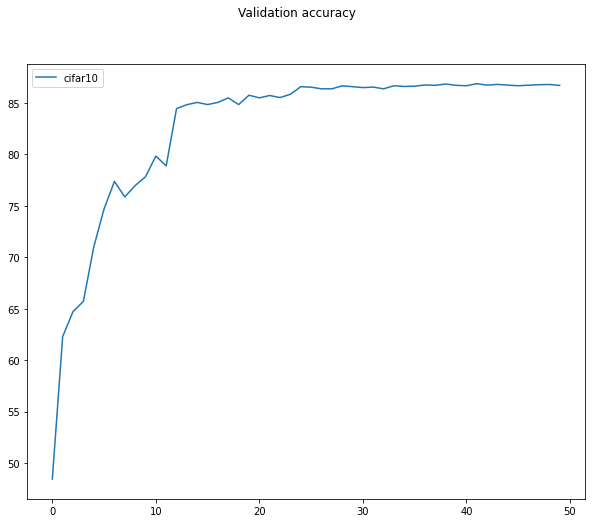


**** Ended Plotting multigraph ****



In [ ]:
plot_multigraph(lst_plottingJobs_val_acc,lst_plottingLegends_val_acc,title="Validation accuracy")


**** Started Plotting multigraph ****



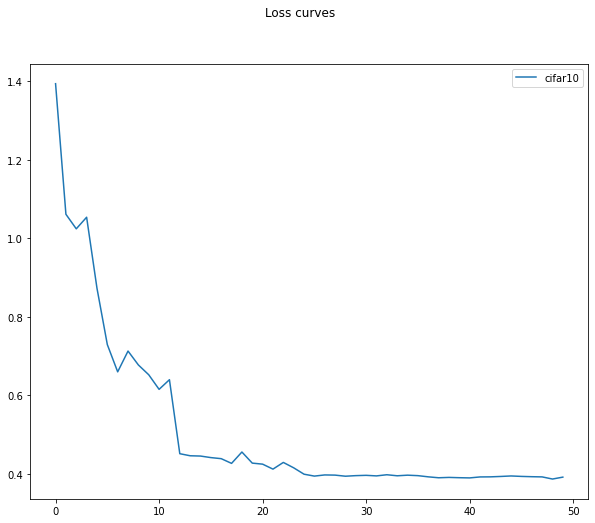


**** Ended Plotting multigraph ****



In [ ]:
plot_multigraph(lst_plottingJobs_loss,lst_plottingLegends_loss,title="Loss curves")

In [ ]:
display_classwise_accuracy(test_loader,device,model)

/content/drive/My Drive/EVA5/Week7New/models/networks/cifar10_dialation_dsc.py:69: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Accuracy of plane : 92 %
Accuracy of   car : 95 %
Accuracy of  bird : 78 %
Accuracy of   cat : 61 %
Accuracy of  deer : 91 %
Accuracy of   dog : 91 %
Accuracy of  frog : 84 %
Accuracy of horse : 97 %
Accuracy of  ship : 93 %
Accuracy of truck : 98 %
